In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn import metrics#参数，roc和auc
from sklearn.preprocessing import label_binarize#二值化
import joblib
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
names = ["AmismatchRate","Arate","UmismatchRate","Urate","GmismatchRate","Grate","CmismatchRate","Crate","label"]#df.columns
path1="./control.csv"
path2="./treat.csv"
# path1="~/project/t3_ontnewrna/output/paper-unlabled/TrainData/CrandomForestTrainData.csv"
# path2="~/project/t3_ontnewrna/output/OV-FTO-2-0603/TrainData/TrandomForestTrainData.csv"
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df1["label"]=0
df2["label"]=1
df=pd.concat([df1,df2])
df = df[names]
df=df.replace([np.inf, -np.inf], np.nan)
print(df.shape)
df

(6046771, 9)


AmismatchRate   Arate  UmismatchRate   Urate  GmismatchRate   Grate  \
0               0.0284  0.2787         0.0247  0.2990         0.0358  0.1978   
1               0.0265  0.2753         0.0291  0.2990         0.0344  0.2002   
2               0.1487  0.3000         0.2929  0.2121         0.1457  0.2495   
3               0.1498  0.3389         0.2718  0.2549         0.1638  0.2185   
4               0.0211  0.2671         0.0352  0.3642         0.0211  0.1734   
...                ...     ...            ...     ...            ...     ...   
3025013         0.0069  0.2144         0.0412  0.2209         0.0034  0.2750   
3025014         0.0337  0.3744         0.0325  0.2332         0.0072  0.2210   
3025015         0.0153  0.3381         0.0174  0.2812         0.0131  0.1993   
3025016         0.0325  0.2281         0.0163  0.1983         0.0163  0.2645   
3025017         0.0275  0.3171         0.0191  0.2618         0.0169  0.2330   

         CmismatchRate   Crate  label  
0               0.0321  0.2245      0  
1               0.0397  0.2255      0  
2               0.1472  0.2383      0  
3               0.2160  0.1877      0  
4               0.0164  0.1954      0  
...                ...     ...    ...  
3025013         0.0241  0.2897      1  
3025014         0.0169  0.1713      1  
3025015         0.0131  0.1814      1  
3025016         0.0163  0.3091      1  
3025017         0.0212  0.1881      1  

[6046771 rows x 9 columns]

In [3]:
#.划分测试集合训练集

x=df.iloc[:,0:-1]
y=df.iloc[:,-1:]

x=x.replace("inf", np.NAN)

#通过平局值来替换nan
#imputer = SimpleImputer(missing_values="NaN")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x=imputer.fit_transform(x,y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("训练样本数量:%d,特征属性数目:%d,目标属性数目:%d"%(x_train.shape[0],x_train.shape[1],y_train.shape[1]))

训练样本数量:4837416,特征属性数目:8,目标属性数目:1


In [4]:
ss = MinMaxScaler()
#x_train
# y_train
ss = MinMaxScaler()
x_train2 = x_train
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train2 = ss.transform(x_train2)
y12 = []
for i in y_test["label"]:
    y12.append(i)

In [5]:
rf = RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=30,random_state=1)
rf.fit(x_train,y_train)
#joblib.dump(rf, "test.pkl")
score = rf.score(x_test,y_test)
score2 = rf.score(x_train2,y_train)
#score2 = rf.socre(x_train,y_train)
print("准确率：%.2f%%"%(score*100))
print("准确率：%.2f%%"%(score2*100))
cv_results = cross_validate(rf,x_train,y_train,return_train_score=True)
print(cv_results["train_score"].mean())
print(cv_results["test_score"].mean())
forest_y_score1 = rf.predict(x_test)
forest_y_score1

C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


准确率：82.24%
准确率：97.77%


C:\Users\panda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\panda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\panda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\panda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

0.9784943552227008
0.8040511713911132


array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [6]:
forest_y_score = rf.predict_proba(x_test)
p1,p2=[],[]
for j in forest_y_score:
    p1.append(j[0])
    p2.append(j[1])
with open("x_test.csv","w") as opf:
    opf.write("AmismatchRate,UmismatchRate,GmismatchRate,CmismatchRate,label,predict,prob1,prob2\n")
    for i in x_test:
        opf.write(",".join(map(str, i))+"\n")
# xtest = pd.read_csv("./x_test.csv")
# xtest["label"] = y12
# xtest["predict"] = forest_y_score1
# xtest["prob1"] = p1
# xtest["prob2"] = p2
# xtest.to_csv("xtest.csv",index=False,sep=',')
# print(x_test)
# print(x_test.shape)
# print(forest_y_score)
# print(forest_y_score.shape)
#print(y_test[names[-1]])
# forest_y_score = rf.predict_proba(x_test)
# print(forest_y_score)
#计算roc和auc
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(y_test[names[-1]],classes=[0,1,2]).T[0:-1].T.ravel(), forest_y_score.ravel())
#AUC值
auc1 = metrics.auc(forest_fpr1, forest_tpr1)
print ("5EU目标属性AUC值：", auc1)

5EU目标属性AUC值： 0.910202223735844


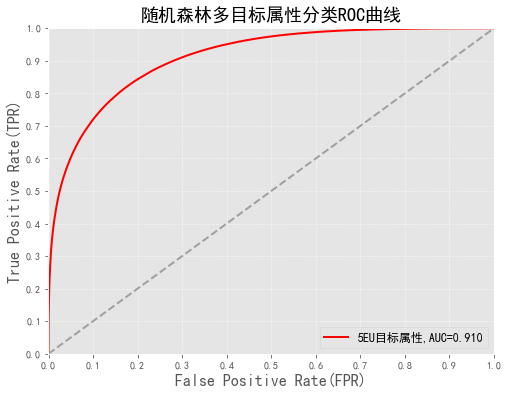

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(forest_fpr1,forest_tpr1,c='r',lw=2,label=u'5EU目标属性,AUC=%.3f' % auc1)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线', fontsize=18)
plt.show()

训练样本数量3023385，测试样本数量:3023386


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1决策树数目，1最大深度，正确率:63.44%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1决策树数目，2最大深度，正确率:63.44%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1决策树数目，3最大深度，正确率:63.68%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1决策树数目，7最大深度，正确率:64.24%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1决策树数目，15最大深度，正确率:64.73%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50决策树数目，1最大深度，正确率:63.46%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50决策树数目，2最大深度，正确率:63.46%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50决策树数目，3最大深度，正确率:63.69%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50决策树数目，7最大深度，正确率:64.42%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50决策树数目，15最大深度，正确率:66.95%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100决策树数目，1最大深度，正确率:63.46%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100决策树数目，2最大深度，正确率:63.48%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100决策树数目，3最大深度，正确率:63.68%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100决策树数目，7最大深度，正确率:64.41%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100决策树数目，15最大深度，正确率:66.99%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


500决策树数目，1最大深度，正确率:63.46%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


500决策树数目，2最大深度，正确率:63.46%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


500决策树数目，3最大深度，正确率:63.69%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


500决策树数目，7最大深度，正确率:64.41%


C:\Users\panda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


500决策树数目，15最大深度，正确率:67.04%


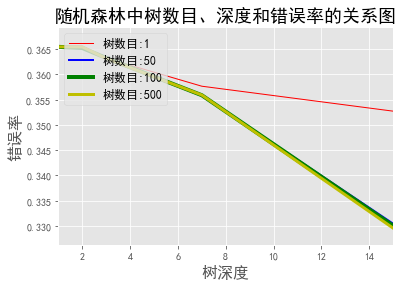

In [8]:
# 比较不同树数目、树最大深度的情况下随机森林的正确率
# 一般情况下，初始的随机森林树个数是100，深度1，如果需要我们再进行优化操作
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size=0.5, random_state=0)
print("训练样本数量%d，测试样本数量:%d" % (x_train2.shape[0], x_test2.shape[0]))
## 比较
estimators = [1, 50, 100, 500]
depth = [1, 2, 3, 7, 15]
err_list = []
for es in estimators:
       es_list = []
       for d in depth:
              tf = RandomForestClassifier(n_estimators=es, criterion='gini', max_depth=d, max_features=None,
                                          random_state=0)
              tf.fit(x_train2, y_train2)
              st = tf.score(x_test2, y_test2)
              err = 1 - st
              es_list.append(err)
              print("%d决策树数目，%d最大深度，正确率:%.2f%%" % (es, d, st * 100))
       err_list.append(es_list)

## 画图
plt.figure(facecolor='w')
i = 0
colors = ['r', 'b', 'g', 'y']
lw = [1, 2, 4, 3]
max_err = 0
min_err = 100
for es, l in zip(estimators, err_list):
       plt.plot(depth, l, c=colors[i], lw=lw[i], label=u'树数目:%d' % es)
       max_err = max((max(l), max_err))
       min_err = min((min(l), min_err))
       i += 1
plt.xlabel(u'树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.legend(loc='upper left', fancybox=True, framealpha=0.8, fontsize=12)
plt.grid(True)
plt.xlim(min(depth), max(depth))
plt.ylim(min_err * 0.99, max_err * 1.01)
plt.title(u'随机森林中树数目、深度和错误率的关系图', fontsize=18)
plt.show()